In [121]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from category_encoders import BinaryEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold


from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [122]:
train_df = pd.read_csv('../Data/train_df.csv')
test_df = pd.read_csv('../Data/test_df.csv')

In [123]:
train_df.Model.nunique()

1248

In [124]:
train_df

,Brand,Model,Year,Run,City,Benz,L,Transmission,Price_USD,Special
0,Volvo,V60,2014,183,Тернопіль,benz,2.5,auto,14799,False
1,Opel,Vectra C,2008,209,Львів,dis,1.9,mech,5000,False
2,Hyundai,Getz,2007,180,Одеса,Unknown,1.6,mech,4950,False
3,Mazda,CX-5,2014,183,Полтава,benz,2.5,auto,14000,False
4,Honda,Accord,2017,117,Вінниця,benz,2.4,var,13950,False
...,...,...,...,...,...,...,...,...,...,...
45892,Hyundai,ix35,2012,140,Київ,benz,2,auto,14500,False
45893,Volkswagen,Tiguan,2011,180,Івано-Франківськ,benz,Unknown,auto,9600,False
45894,Nissan,TIIDA,2007,269,Київ,benz,1.6,mech,5200,False
45895,Chrysler,Concorde,2003,180,Дніпро,gb,3.5,auto,9600,False


In [125]:
(train_df.Brand +" "+ train_df.Model)

0                Volvo V60
1            Opel Vectra C
2             Hyundai Getz
3               Mazda CX-5
4             Honda Accord
               ...        
45892         Hyundai ix35
45893    Volkswagen Tiguan
45894         Nissan TIIDA
45895    Chrysler Concorde
45896       Hyundai Sonata
Length: 45897, dtype: object

In [126]:
train_df.Price_USD = np.log1p(train_df.Price_USD)
test_df.Price_USD = np.log1p(test_df.Price_USD)

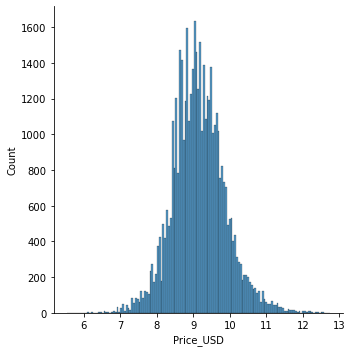

In [127]:
sns.displot(train_df.Price_USD)

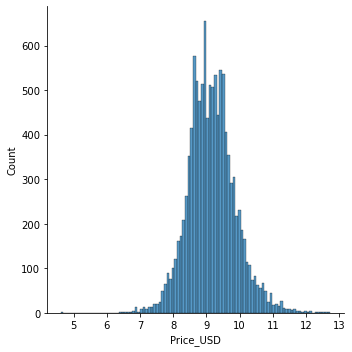

In [128]:
sns.displot(test_df.Price_USD)

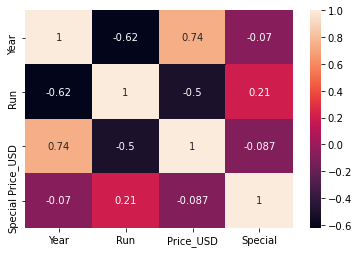

In [129]:
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Coding Features

In [130]:
train_df[train_df.iloc[:, :-1].duplicated()]

,Brand,Model,Year,Run,City,Benz,L,Transmission,Price_USD,Special
440,BMW,528,2012,229,Тернопіль,benz,2,auto,9.554001,False
552,Renault,Grand Scenic,2016,210,Луцьк,dis,1.5,rob,9.314790,False
575,Hyundai,Tucson,2009,112,Чернівці,dis,2,mech,9.047939,False
833,Kia,Optima,2013,151,Київ,benz,2.4,auto,9.345832,False
958,Volkswagen,Passat B5,2003,281,Чернівці,dis,2.5,tip,8.556606,False
...,...,...,...,...,...,...,...,...,...,...
45878,Renault,Megane,2013,170,Тернопіль,dis,1.5,mech,8.987322,False
45880,Mitsubishi,Pajero,1998,372,Львів,gb,3,mech,8.962007,False
45884,Audi,A8,1998,270,Харків,dis,2.5,auto,8.294300,False
45891,Peugeot,308,2010,200,Львів,benz,1.6,mech,8.824825,False


In [131]:
train_df.drop(train_df.L[train_df.L == 'Не'].index, inplace=True)
test_df.drop(test_df.L[test_df.L == 'Не'].index, inplace=True)

In [132]:
train_df.L[train_df.L == 'Unknown'] = '-100'
test_df.L[test_df.L == 'Unknown'] = '-100'

<ipython-input-132-136c5d3c5d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.L[train_df.L == 'Unknown'] = '-100'
<ipython-input-132-136c5d3c5d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.L[test_df.L == 'Unknown'] = '-100'


In [133]:
train_df.L = train_df.L.astype('float64')
test_df.L = test_df.L.astype('float64')

In [134]:
train_df.drop(train_df[train_df.iloc[:, :-1].duplicated()].index, inplace=True)
test_df.drop(test_df[test_df.iloc[:, :-1].duplicated()].index, inplace=True)

In [135]:
encoder = BinaryEncoder(cols=['Brand', 'City','Model', 'Benz', 'Transmission'], return_df=True, verbose=True)

In [136]:
binary_enc_train = encoder.fit_transform(train_df)

C:\Users\user\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [137]:
binary_enc_test = encoder.transform(test_df)

Selecting the best model

In [71]:
X_train, X_test, y_train, y_test = train_test_split(binary_enc_train.drop('Price_USD', axis=1), binary_enc_train.Price_USD, test_size=.3, shuffle=True, random_state=17)

In [72]:
import lightgbm as lgb
import xgboost as xgb

### LightGBM

In [73]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

In [74]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'learning_rate': 0.005,
    'num_iterations': 10000,
    'n_estimators': 1000,
    'verbose': 0
}


In [75]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [76]:
%%time
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='mse',
        early_stopping_rounds=1000, verbose=0)

C:\Users\user\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Wall time: 19.8 s


LGBMRegressor(learning_rate=0.005, metric=['mse'], n_estimators=1000,
              num_iterations=10000, objective='regression', task='train',
              verbose=0)

In [77]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [78]:
print(f'Train mse: { mean_squared_error( y_train, y_pred_train,)}' )
print(f'Test mse: { mean_squared_error(y_test, y_pred_test)}' )

Train mse: 0.022747808661437996
Test mse: 0.03928652301588681


### XGB

In [79]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [80]:
params_xgb = {
    'booster':'dart',
    'verbosity': 0,
    'objective': 'reg:squarederror',
    'n_estimators': 500,
    'learning_rate': 0.01,
    'n_jobs': -1}

In [81]:
%%time
bst = xgb.XGBRegressor(**params_xgb )


Wall time: 0 ns


In [82]:
%%time
bst.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], eval_metric='rmse', verbose=True,early_stopping_rounds=50)

[0]	validation_0-rmse:8.60109	validation_1-rmse:8.60666
[1]	validation_0-rmse:8.51528	validation_1-rmse:8.52082
[2]	validation_0-rmse:8.43033	validation_1-rmse:8.43585
[3]	validation_0-rmse:8.34623	validation_1-rmse:8.35172
[4]	validation_0-rmse:8.26297	validation_1-rmse:8.26844
[5]	validation_0-rmse:8.18055	validation_1-rmse:8.18599
[6]	validation_0-rmse:8.09895	validation_1-rmse:8.10436
[7]	validation_0-rmse:8.01817	validation_1-rmse:8.02355
[8]	validation_0-rmse:7.93820	validation_1-rmse:7.94355
[9]	validation_0-rmse:7.85903	validation_1-rmse:7.86433
[10]	validation_0-rmse:7.78064	validation_1-rmse:7.78591
[11]	validation_0-rmse:7.70305	validation_1-rmse:7.70826
[12]	validation_0-rmse:7.62623	validation_1-rmse:7.63140
[13]	validation_0-rmse:7.55018	validation_1-rmse:7.55533
[14]	validation_0-rmse:7.47490	validation_1-rmse:7.48001
[15]	validation_0-rmse:7.40036	validation_1-rmse:7.40544
[16]	validation_0-rmse:7.32657	validation_1-rmse:7.33163
[17]	validation_0-rmse:7.25352	validation

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [83]:
bst.best_ntree_limit

500

In [84]:
y_pred_train = bst.predict(X_train)
y_pred_test = bst.predict(X_test)

In [85]:
print(f'Train mse: { mean_squared_error( y_train, y_pred_train,)}' )
print(f'Test mse: { mean_squared_error(y_test, y_pred_test)}' )

Train mse: 0.05492752595951797
Test mse: 0.06316887840706428


In [86]:
y_pred_test

array([9.4295845, 9.095888 , 9.3018675, ..., 8.257387 , 9.447603 ,
       7.660501 ], dtype=float32)

In [87]:
y_test

44351    9.878221
4752     9.200391
14423    9.350189
40244    8.575651
35452    8.922792
           ...   
11662    8.699515
43567    8.936035
24999    8.517393
9299     9.503010
23571    8.006701
Name: Price_USD, Length: 12206, dtype: float64

In [88]:
np.expm1(y_train)

37283    19999.0
30246    36000.0
25920     6300.0
3332     15200.0
9868      2000.0
          ...   
34014    15900.0
27645     7500.0
36620     2600.0
38792     5450.0
11218     5300.0
Name: Price_USD, Length: 28478, dtype: float64

In [89]:
np.expm1(y_pred_train)

array([16624.45  , 24751.225 ,  5945.627 , ...,  3878.5723,  5075.7417,
        4700.7876], dtype=float32)

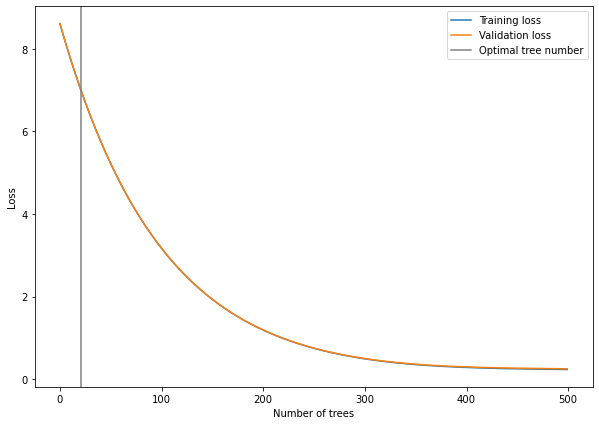

In [90]:
results = bst.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [91]:
d = {'Learning Rate':[],
            'Test Error': [],
            'Training Error': []}
for lr in np.logspace(0.15, 0.2, 10):
    xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=lr,)
    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], eval_metric='rmse', verbose=False, early_stopping_rounds=100, )
    y_train_xgb = xgb_model.predict(X_train)
    y_test_xgb = xgb_model.predict(X_test)
    d['Learning Rate'].append(lr)
    d['Training Error'].append(mean_squared_error(y_train_xgb, y_train))
    d['Test Error'].append(mean_squared_error(y_test_xgb, y_test))



xgb_tuning_1 = pd.DataFrame(d)

xgb_tuning_1.sort_values(by='Test Error')

,Learning Rate,Test Error,Training Error
0,1.412538,0.077067,0.052674
1,1.430723,0.080051,0.053096
2,1.449143,0.081740,0.057636
3,1.467799,0.082961,0.043812
4,1.486696,0.084003,0.058360
6,1.525223,0.084247,0.057885
5,1.505836,0.088740,0.060651
7,1.544859,0.089638,0.050403
8,1.564748,0.089789,0.053666
9,1.584893,0.091583,0.062049


In [92]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'n_estimators': 1000,
    'verbose': 0
}

In [93]:
d = {'Learning Rate':[],
            'Test Error': [],
            'Training Error': []}
for lr in  np.linspace(0.0001, 0.1, 40):
    lgb_model = lgb.LGBMRegressor(**hyper_params, learning_rate=lr, )
    lgb_model.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='mse',
        early_stopping_rounds=1000, verbose=0)
    y_train_lgb = lgb_model.predict(X_train)
    y_test_lgb = lgb_model.predict(X_test)
    d['Learning Rate'].append(lr)
    d['Training Error'].append(mean_squared_error(y_train_lgb, y_train))
    d['Test Error'].append(mean_squared_error(y_test_lgb, y_test))



lgb_tuning_1 = pd.DataFrame(d)
lgb_tuning_1.sort_values(by='Test Error')

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing

,Learning Rate,Test Error,Training Error
38,0.097438,0.037395,0.015110
37,0.094877,0.037430,0.015603
39,0.100000,0.037460,0.015124
34,0.087192,0.037647,0.016785
35,0.089754,0.037735,0.016113
36,0.092315,0.037800,0.015825
29,0.074385,0.037900,0.018040
30,0.076946,0.037940,0.017834
22,0.056454,0.037995,0.020757
32,0.082069,0.037998,0.017364


In [109]:
hyper_params['learning_rate'] = lgb_tuning_1.sort_values(by='Test Error')['Learning Rate'][38]

In [111]:
hyper_params = {'task': 'train',
     'boosting_type': 'gbdt',
     'objective': 'regression',
     'metric': ['mse'],
     'n_estimators': 1000,
     'verbose': 0,
     'learning_rate': 0.09743846153846154}


Randomized search cv

In [112]:
tunning_params = {
    'max_depth': range(5,25),
    'learning_rate': [0.09743846153846154],
    'num_leaves': range(2,25),
    'subsample' : [0.3],
    'reg_alpha' : np.linspace(0.1, 0.9, 10),
    'reg_lambda' : np.linspace(1.3, 2, 10)
    
}

In [113]:
mdl = lgb.LGBMRegressor(**hyper_params)
kf = KFold(n_splits=3, random_state=17, shuffle=True)
rnd_cv = RandomizedSearchCV(estimator=mdl, param_distributions=tunning_params, scoring='neg_mean_squared_error', cv=kf, verbose=1, n_jobs=-1)
rnd_cv.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(rnd_cv.best_score_, rnd_cv.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [114]:
best_params = rnd_cv.best_params_

In [115]:
best_params

{'subsample': 0.3,
 'reg_lambda': 1.3,
 'reg_alpha': 0.2777777777777778,
 'num_leaves': 22,
 'max_depth': 7,
 'learning_rate': 0.09743846153846154}

In [116]:
best_lgbm = rnd_cv.best_estimator_

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

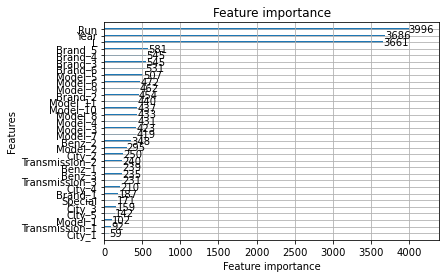

In [117]:
lgb.plot_importance(best_lgbm)

In [118]:
train_df

,Brand,Model,Year,Run,City,Benz,L,Transmission,Price_USD,Special
0,Volvo,V60,2014,183,Тернопіль,benz,2.5,auto,9.602382,False
1,Opel,Vectra C,2008,209,Львів,dis,1.9,mech,8.517393,False
2,Hyundai,Getz,2007,180,Одеса,Unknown,1.6,mech,8.507345,False
3,Mazda,CX-5,2014,183,Полтава,benz,2.5,auto,9.546884,False
4,Honda,Accord,2017,117,Вінниця,benz,2.4,var,9.543306,False
...,...,...,...,...,...,...,...,...,...,...
45890,Volkswagen,Passat B8,2017,44,Київ,benz,1.8,auto,9.729194,False
45893,Volkswagen,Tiguan,2011,180,Івано-Франківськ,benz,-100.0,auto,9.169623,False
45894,Nissan,TIIDA,2007,269,Київ,benz,1.6,mech,8.556606,False
45895,Chrysler,Concorde,2003,180,Дніпро,gb,3.5,auto,9.169623,False


In [138]:
binary_enc_train.to_csv('../Data/binary_transformed_train.csv', index=False)
binary_enc_test.to_csv('../Data/binary_transformed_test.csv', index=False)